## <center>CITS5508 Lab sheet 2: Classification on Japanese Forest Data</center>

**Name: Samuel Heath**<br>
**Student number: 27125083**<br>
**Date created:** March 11th 2019<br>
**Last modified:** March 22th 2019<br>

A brief description about the work done in this lab sheet...


## 1. Initialisation and File I/O

A brief description about the task for this part ...

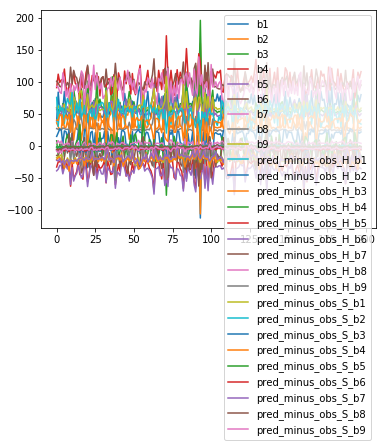

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the training and testing datasets
training_set = pd.read_csv('training.csv')
testing_set = pd.read_csv('testing.csv')

# Display what the raw data stored looks like
training_set.head()

training_set.plot()
plt.show()

Maybe you need a *markdown* cell here to explain the output of the previous `Code` cell. 

You can emphasize words in your sentences using boldface, e.g., **this is important**. You can even put in reasonably complex mathematics equations in a *Markdown* cell.

To run (or execute) a cell, click on the cell and press the *Enter* key while holding down the *Shift* key. You can merge cells, split cells, insert cells above or below the current cell.

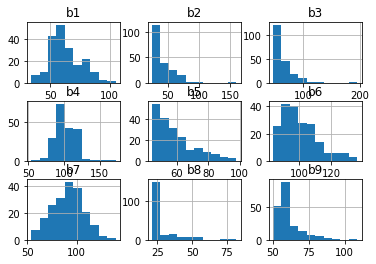

In [42]:
# Remove unneeded features from the data
training_set = training_set[list(filter(lambda x: 'pred_minus' not in x, training_set.columns.get_values()))]
# Redisplay the values
training_set.head()
training_set.hist()
plt.show()

## 2. Heading...

class
d    54
h    48
o    37
s    59
dtype: int64


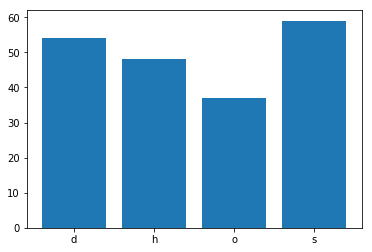

In [77]:
print(training_set.groupby('class').size())
plt.bar(x=training_set.sort_values('class')['class'].unique(), height=training_set.groupby('class').size())
plt.show()

From the above bar graph we can see that the sizes of the grouped classes the dataset are not even and so, the dataset can be considered imbalanced.